<a href="https://colab.research.google.com/github/Pavalya-Periyasamy05/Machine-Learning-and-AI/blob/main/Regression_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **QSAR Model Building of KRAS GTPase protein inhibitor**

### Building a machine learning model using the ChEMBL bioactivity data

## **Import libraries**

In [30]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **Load the data**

### The dataset is based on **PubChem fingerprints**, which capture **local molecular features** derived from the connectivity of **Lego-like building blocks**, rather than global properties like Lipinski descriptors.

In [31]:
dataset = pd.read_csv("Bioactivity_data_3class_pIC50_pubchem_fp.csv")
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.809668
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.920819
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.744727
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.638272
2747,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.455932
2748,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.275724
2749,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.853872


## **Input features**

### This bioactivity dataset consists of 881 input features and one output variable (pIC50). The unique molecular fingerprints of each compound enable the machine learning algorithm to learn distinctive molecular characteristics and patterns. A predictive model is developed to differentiate between active and inactive compounds. The primary objective is to identify key functional groups or fingerprint features that contribute to the design of potent drug candidates. The target variable used for prediction is pIC50, which is the negative logarithmic transformation of the IC50 value, where IC50 represents the concentration required to inhibit 50% of biological activity.

In [32]:
X = dataset.drop(["pIC50"], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2747,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2748,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2749,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Output features**

In [33]:
Y = dataset.iloc[:,-1]
Y

,pIC50
0,3.809668
1,5.920819
2,5.000000
3,5.744727
4,6.698970
...,...
2746,5.638272
2747,5.455932
2748,5.275724
2749,5.853872


## **Look at the data dimension**

In [34]:
X.shape

(2751, 881)

In [35]:
Y.shape

(2751,)

## **Remove low variance features**

### If a feature has almost the same value for all compounds, it does not help distinguish active vs inactive compounds
### Allow us to build the model much quicker

In [36]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
#fit calculates the variance of each column using the formula p × (1 − p), and transform removes columns whose variance is below the threshold set in VarianceThreshold.

In [37]:
X.shape

(2751, 157)

## **Data split (80/20 ratio)**

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [39]:
X_train.shape, Y_train.shape

((2200, 157), (2200,))

In [40]:
X_test.shape, Y_test.shape

((551, 157), (551,))

## **Building a Regression Model using Random Forest**

In [41]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6766337713418277

## **Prediction**

In [42]:
Y_pred = model.predict(X_test)

## **Scatter Plot of Experimental vs Predicted pIC50 values**

<function matplotlib.pyplot.show(close=None, block=None)>

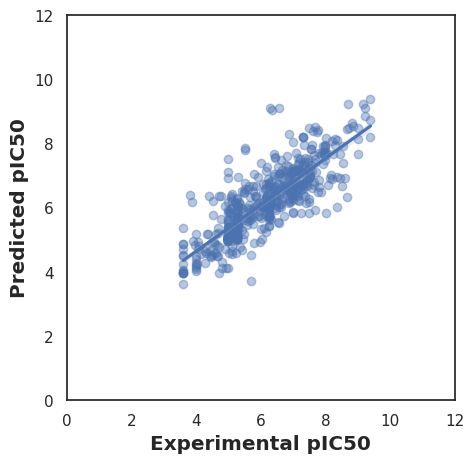

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes = True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={"alpha": 0.4})
ax.set_xlabel("Experimental pIC50", fontsize="large", fontweight="bold")
ax.set_ylabel("Predicted pIC50", fontsize="large", fontweight="bold")
ax.set_xlim(0,12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5,5)
plt.show